In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# set work directory
path = os.getcwd()

In [5]:
#read data
itrain = pd.read_excel(str(path) + "/04_telecom_train.xlsx")
itest = pd.read_excel(str(path) + "/04_telecom_test (2).xlsx")

In [5]:
itrain.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
9,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


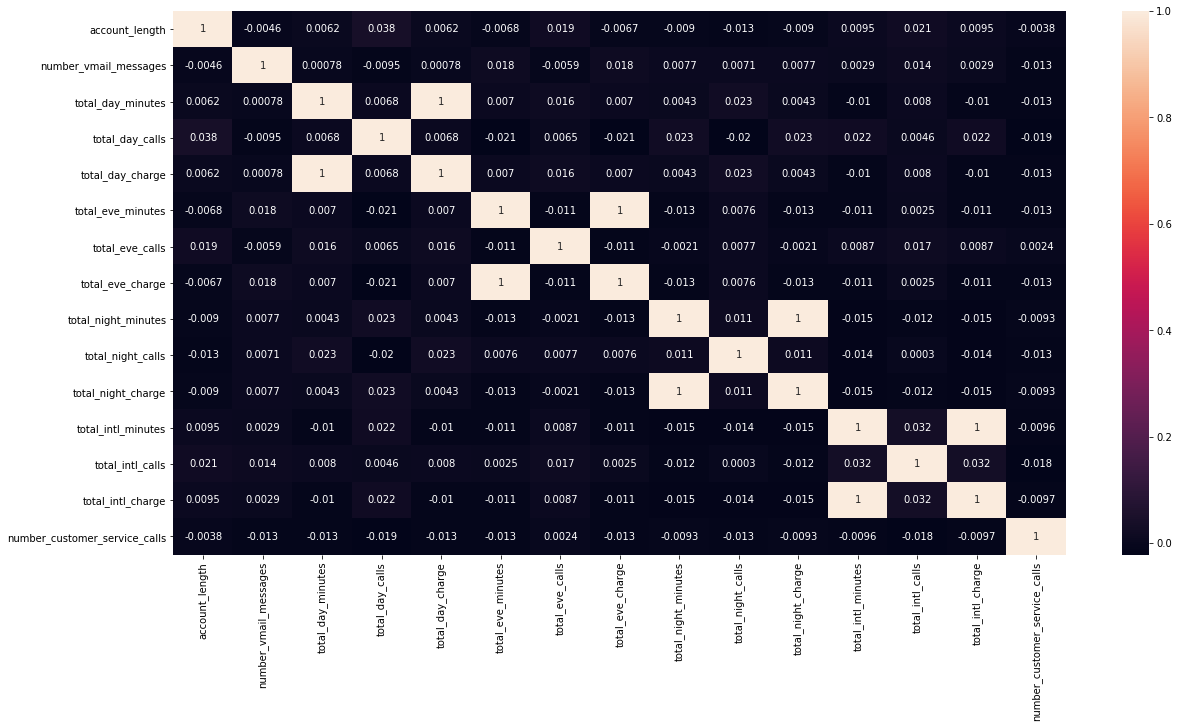

In [6]:
plt.subplots(figsize=(20,10))
sns.heatmap(itrain.corr(), annot = True)

In [7]:
#removing variables with 1:1 correlation.
dump_col = ['total_day_minutes','total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']

#### Imbalanced target variable

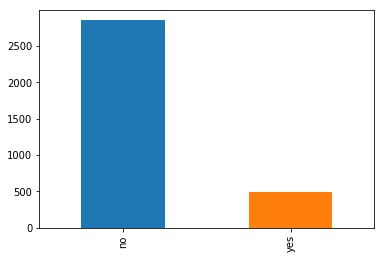

In [8]:
itrain['churn'].value_counts().plot.bar()

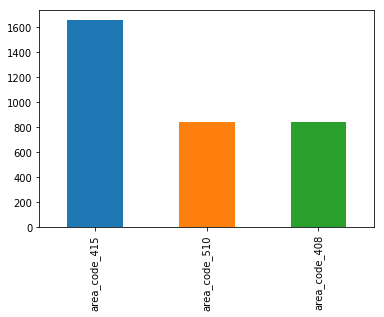

In [9]:
itrain['area_code'].value_counts().plot.bar()

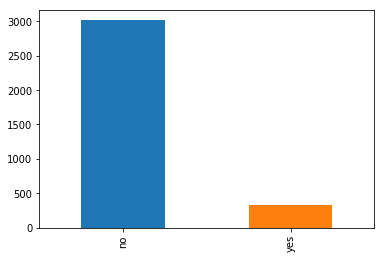

In [10]:
itrain['international_plan'].value_counts().plot.bar()

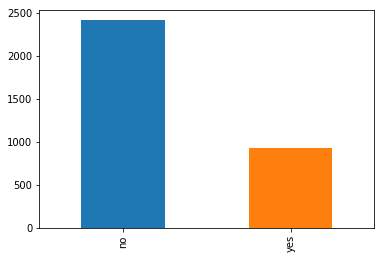

In [11]:
itrain['voice_mail_plan'].value_counts().plot.bar()

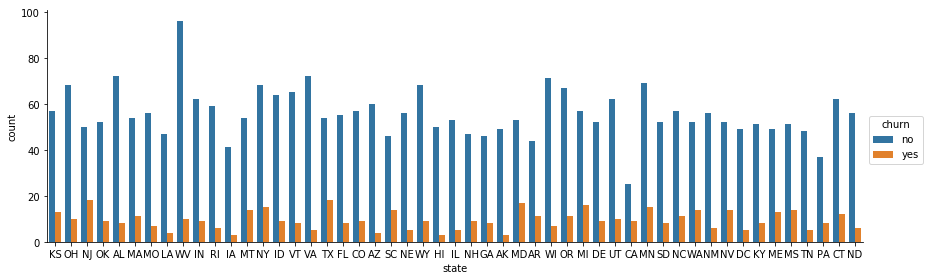

In [12]:
ch = sns.factorplot("state", data=itrain, aspect=3,
                    hue='churn', kind="count")
ch.set_xticklabels(step=1)

### Ordinal Categories to levels: suitable for ordinal categorical data.
### One hot encoding: for nominal categorical data.

In [19]:
itrain_predict = itrain.drop(dump_col, axis =1)
predictors = itrain_predict.drop('churn', axis =1)
predictors = pd.get_dummies(predictors, columns =['area_code', 'international_plan', 'voice_mail_plan', 'state'])

target = itrain['churn']
target = target.replace({'yes' : 1, 'no' : 0 })

In [20]:
itest_rm = itest.drop(dump_col, axis =1)
test = itest_rm.drop('churn', axis =1)
test = pd.get_dummies(test, columns =['area_code', 'international_plan', 'voice_mail_plan', 'state'])

In [21]:
print(predictors.shape)
print(test.shape)
y_test = itest['churn']
y_test = y_test.replace({'yes' : 1, 'no' : 0 })

(3333, 69)
(1667, 69)


### we now have predictors, target to fit the model.
### test = testing data
### y_test = for validating the results
### Fit the Logistic Regression (class weights)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state=7)
classifier = LogisticRegression(random_state=7, class_weight = {0: 0.16, 1: 0.84})
classifier.fit(predictors, target)
#print(classifier.coef_)
#print(classifier.intercept_)

LogisticRegression(C=1.0, class_weight={0: 0.16, 1: 0.84}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Predict for test data

In [53]:
y_pred = classifier.predict(test)

#confusion matrix
cm = pd.crosstab(y_test, y_pred)
cm

col_0,0,1
churn,,
0,1131,312
1,53,171


### metrics for measurement

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.78      0.86      1443
          1       0.35      0.76      0.48       224

avg / total       0.87      0.78      0.81      1667



In [30]:
#print('Accuracy on Validation set: {:.2f}'.format
      #(classifier.score(y_test.reshape(1,-1), y_pred)))

In [51]:
# Function to claculate the Class weights

from collections import Counter
def get_class_weights(y):
    """
    to calculate the weights for each class based on the frequencies of the samples
    returns: dictionary with the weight for each class
    """
    counter = Counter(y)
    
    no_higher_classes = max(counter.values())

    return {cls: float(no_higher_classes) / count for cls, count in counter.items()}

class_weights = get_class_weights(target)
class_weights

{0: 1.0, 1: 5.900621118012422}

### ROC Curve

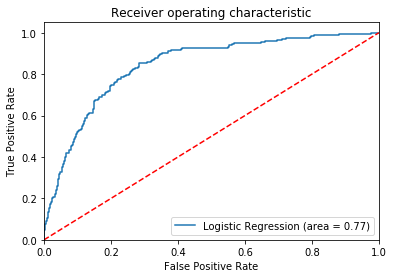

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Verification linearity of logit vs predictors

In [55]:
prob = classifier.predict_proba(predictors)
rows = len(prob)

probabilities = []
for element in range(rows):
    probabilities.append(prob[element][0])
    
logit = []
for i in range(rows):
    logit.append(m.log(probabilities[i]/(1-probabilities[i])))

In [56]:
itrain.columns
num_df = itrain[['account_length', 'number_vmail_messages',
       'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]

In [57]:
num_df['logit'] = logit

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


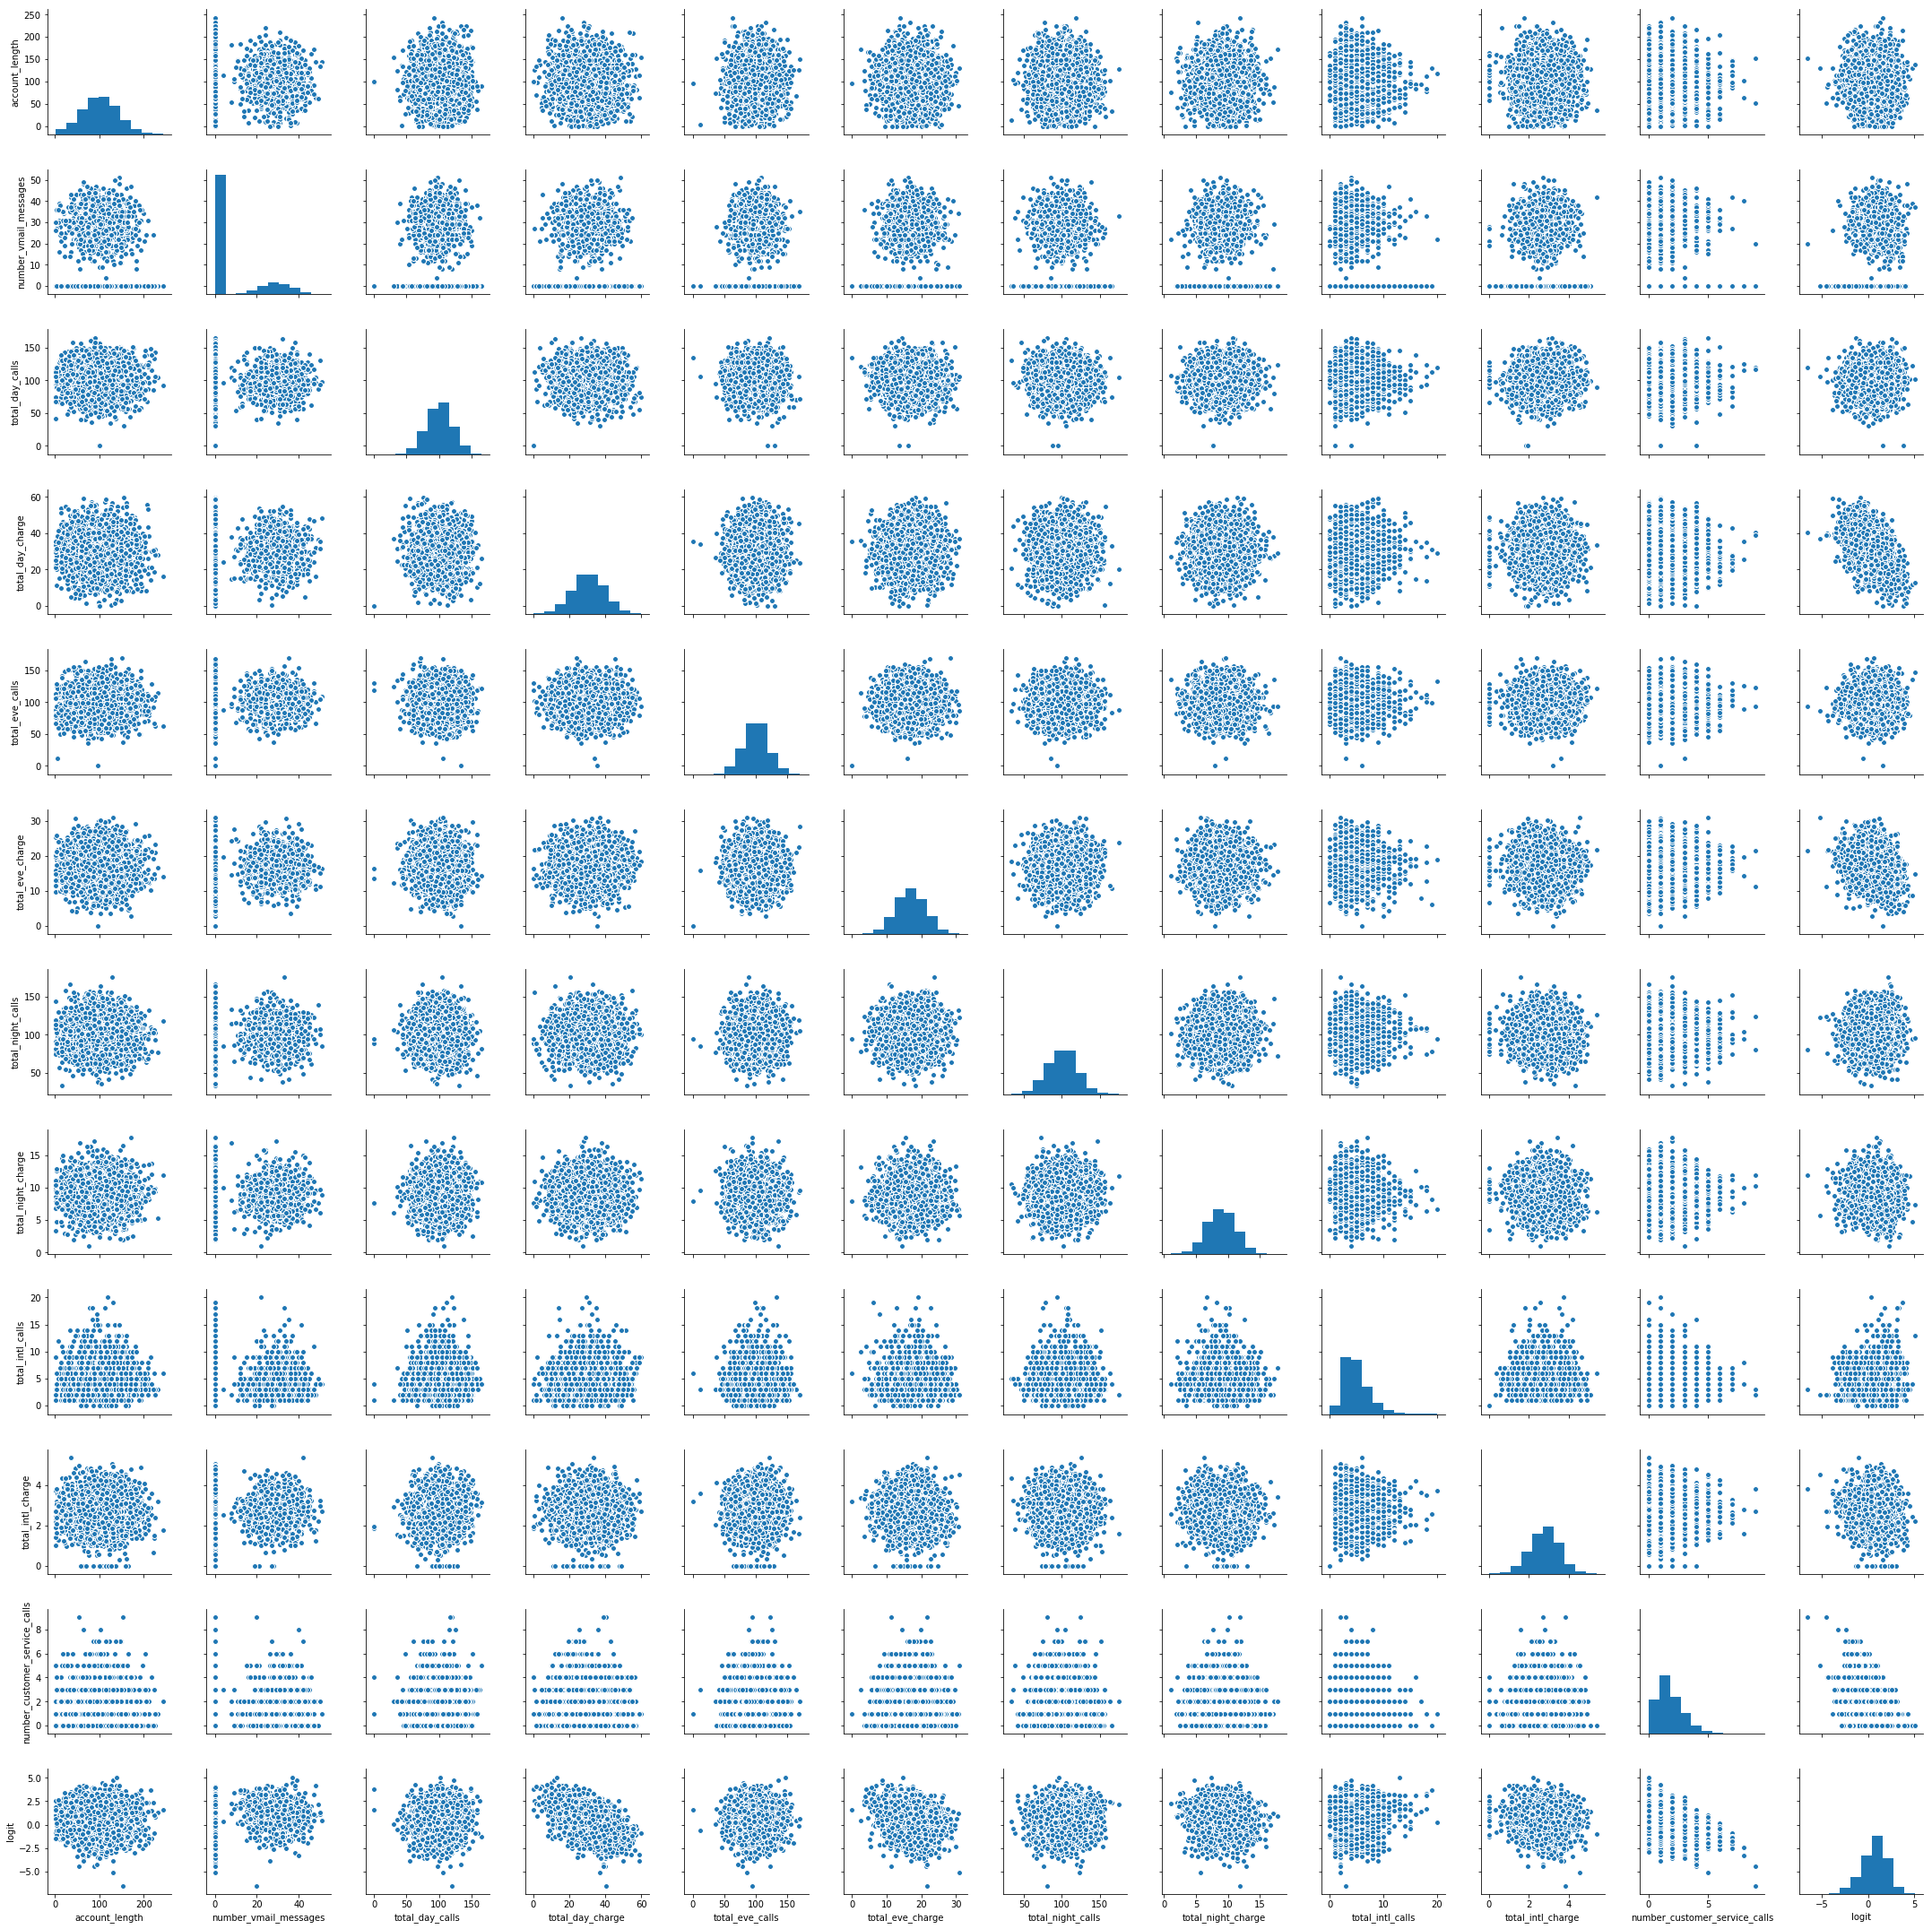

In [35]:
sns.pairplot(num_df)

In [36]:
b = np.array(logit)
b = b.ravel()
b
#sns.regplot(act_length, logit)

array([ 0.51353005,  1.68437855,  0.7285344 , ...,  0.28058958,
       -1.32803597,  1.48570918])

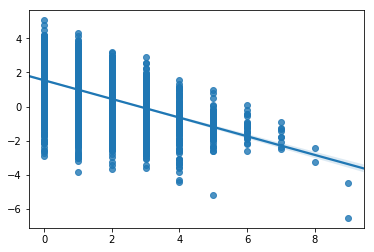

In [37]:
sns.regplot(x= itrain['number_customer_service_calls'].ravel(), y=b)

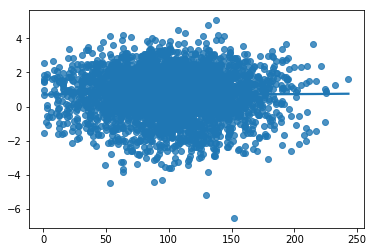

In [38]:
sns.regplot(x= itrain['account_length'].ravel(), y=b, lowess = True)

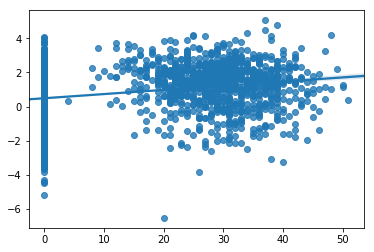

In [39]:
sns.regplot(x= itrain['number_vmail_messages'].ravel(), y=b)

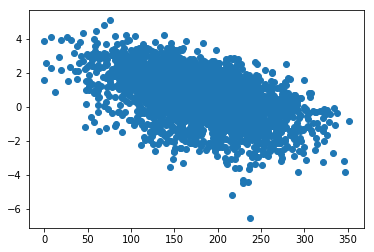

In [40]:
plt.scatter(itrain['total_day_minutes'], b)